<a href="https://colab.research.google.com/github/rithikafjohnson/GRIP-Sept-2021-Sports-EDA/blob/main/GRIP_INTERNSHIP_NUMERIC_AND_TEXTUAL_ANALYSIS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



---


TASK 5: EDA SPORTS


---



DATASET: https://bit.ly/34SRn3b

RITHIKA F JOHNSON

GRIP

Batch of September, 2021
Data and Business Analytics Internship



In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
!unzip Indian\ Premier\ League.zip

Archive:  Indian Premier League.zip
replace deliveries.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: deliveries.csv          
replace matches.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: matches.csv             


In [3]:
df=pd.read_csv("matches.csv")
df.head()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN


In [4]:
df.shape

(756, 18)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 756 entries, 0 to 755
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   id               756 non-null    int64 
 1   season           756 non-null    int64 
 2   city             749 non-null    object
 3   date             756 non-null    object
 4   team1            756 non-null    object
 5   team2            756 non-null    object
 6   toss_winner      756 non-null    object
 7   toss_decision    756 non-null    object
 8   result           756 non-null    object
 9   dl_applied       756 non-null    int64 
 10  winner           752 non-null    object
 11  win_by_runs      756 non-null    int64 
 12  win_by_wickets   756 non-null    int64 
 13  player_of_match  752 non-null    object
 14  venue            756 non-null    object
 15  umpire1          754 non-null    object
 16  umpire2          754 non-null    object
 17  umpire3          119 non-null    ob

In [6]:
df.describe()

,id,season,dl_applied,win_by_runs,win_by_wickets
count,756.000000,756.000000,756.000000,756.000000,756.000000
mean,1792.178571,2013.444444,0.025132,13.283069,3.350529
std,3464.478148,3.366895,0.156630,23.471144,3.387963
min,1.000000,2008.000000,0.000000,0.000000,0.000000
25%,189.750000,2011.000000,0.000000,0.000000,0.000000
50%,378.500000,2013.000000,0.000000,0.000000,4.000000
75%,567.250000,2016.000000,0.000000,19.000000,6.000000
max,11415.000000,2019.000000,1.000000,146.000000,10.000000


In [7]:
df.columns

Index(['id', 'season', 'city', 'date', 'team1', 'team2', 'toss_winner',
       'toss_decision', 'result', 'dl_applied', 'winner', 'win_by_runs',
       'win_by_wickets', 'player_of_match', 'venue', 'umpire1', 'umpire2',
       'umpire3'],
      dtype='object')

In [8]:
df.nunique()

id                 756
season              12
city                32
date               546
team1               15
team2               15
toss_winner         15
toss_decision        2
result               3
dl_applied           2
winner              15
win_by_runs         89
win_by_wickets      11
player_of_match    226
venue               41
umpire1             61
umpire2             65
umpire3             25
dtype: int64

In [9]:
df.isnull().sum()

id                   0
season               0
city                 7
date                 0
team1                0
team2                0
toss_winner          0
toss_decision        0
result               0
dl_applied           0
winner               4
win_by_runs          0
win_by_wickets       0
player_of_match      4
venue                0
umpire1              2
umpire2              2
umpire3            637
dtype: int64

In [10]:
matches_df=df.drop(['umpire3'],axis=1)

In [11]:
len(matches_df['season'].unique())

12

In [12]:
pd.concat([matches_df['team1'],matches_df['team2']]).unique()

array(['Sunrisers Hyderabad', 'Mumbai Indians', 'Gujarat Lions',
       'Rising Pune Supergiant', 'Royal Challengers Bangalore',
       'Kolkata Knight Riders', 'Delhi Daredevils', 'Kings XI Punjab',
       'Chennai Super Kings', 'Rajasthan Royals', 'Deccan Chargers',
       'Kochi Tuskers Kerala', 'Pune Warriors', 'Rising Pune Supergiants',
       'Delhi Capitals'], dtype=object)

**General Analysis**

*Number of matches played in each season*

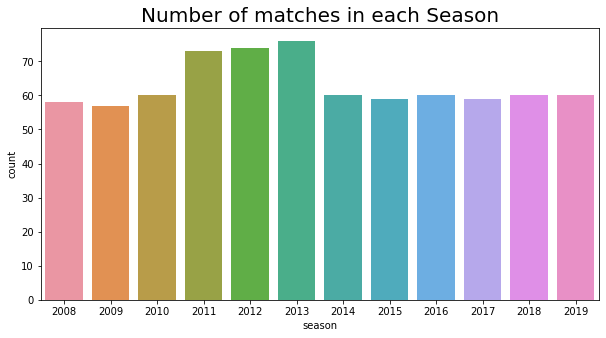

In [13]:
plt.subplots(figsize=(10,5))
sns.countplot(x=matches_df['season'].sort_values())
plt.title('Number of matches in each Season',fontsize=20)
plt.show()

**Observation:** The highest number of matches was played in the year 2013

*Team with most wins*

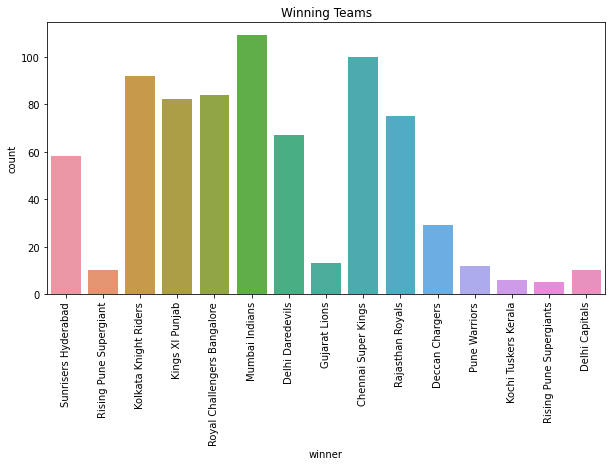

In [14]:
plt.figure(figsize=(10,5))
sns.countplot(x='winner',data=matches_df)
plt.title('Winning Teams')
plt.xticks(rotation=90);

**Observation:** MI is the team that has the most number of wins

*Team that has won most number of tosses*

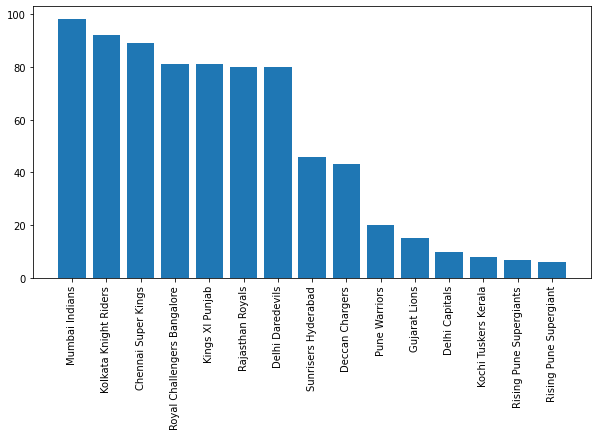

In [15]:
plt.figure(figsize=(10,5))
plt.bar(list(matches_df['toss_winner'].value_counts().keys()),list(matches_df['toss_winner'].value_counts()))
plt.xticks(rotation=90)
plt.show()

**Observation:** MI has won the most number of tosses

*Toss decisions made by teams*

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


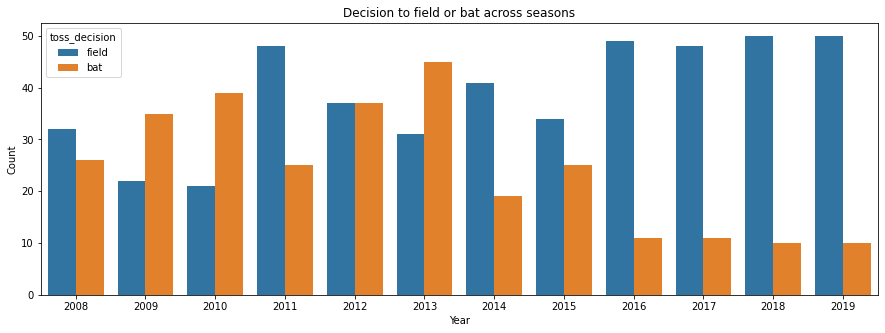

In [16]:
plt.figure(figsize=(15,5))
sns.countplot(matches_df['season'].sort_values(),hue=matches_df['toss_decision'])
plt.title("Decision to field or bat across seasons")
plt.xlabel('Year')
plt.ylabel('Count')
plt.show()

**Observation:** It is observed that many teams prefer chasing with the progression of time. 

*Venue whiched hosted the highest number of matches *

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40]),
 <a list of 41 Text major ticklabel objects>)

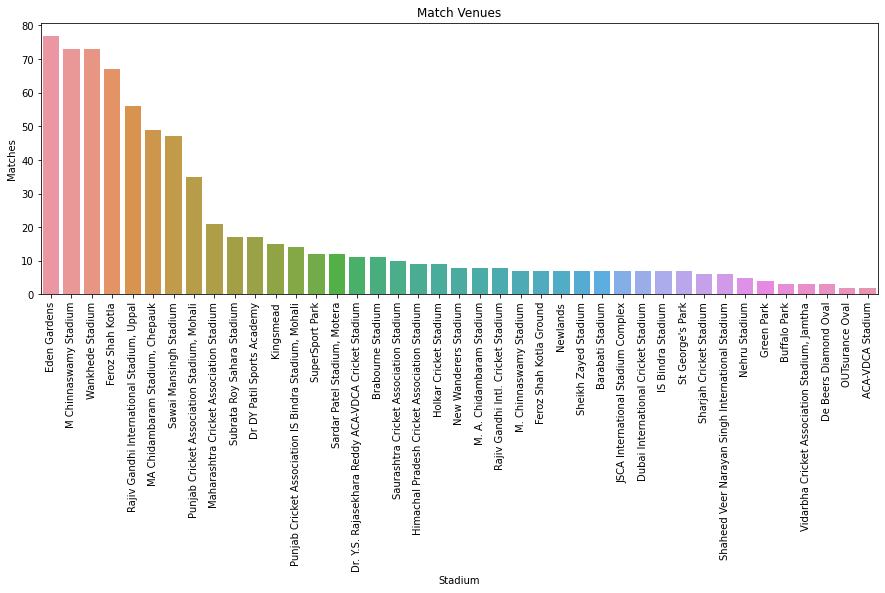

In [17]:
plt.subplots(figsize=(15,5))
sns.countplot(x ='venue',data = matches_df,order = matches_df['venue'].value_counts().index)
plt.title('Match Venues')
plt.xlabel('Stadium')
plt.ylabel('Matches')
plt.xticks(rotation = 90)

**Observation:** Eden Gardens has hosted the highest number of matches

*Winning based on batting first*

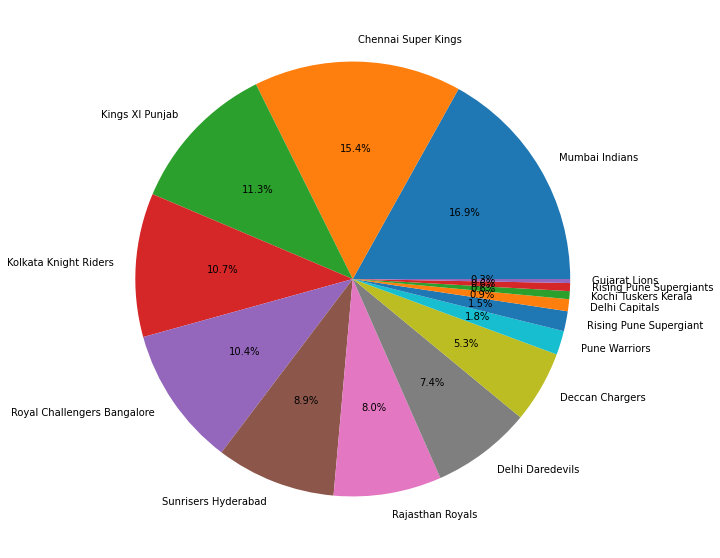

In [18]:
batting_first = matches_df[matches_df['win_by_runs']!=0]
plt.figure(figsize=(10,10))
plt.pie(list(batting_first['winner'].value_counts()), labels=list(batting_first['winner'].value_counts().keys()),autopct='%0.1f%%')
plt.show()

**Observation:** MI has the most wins compared to other teams while batting first


*Winning team based on chasing first*

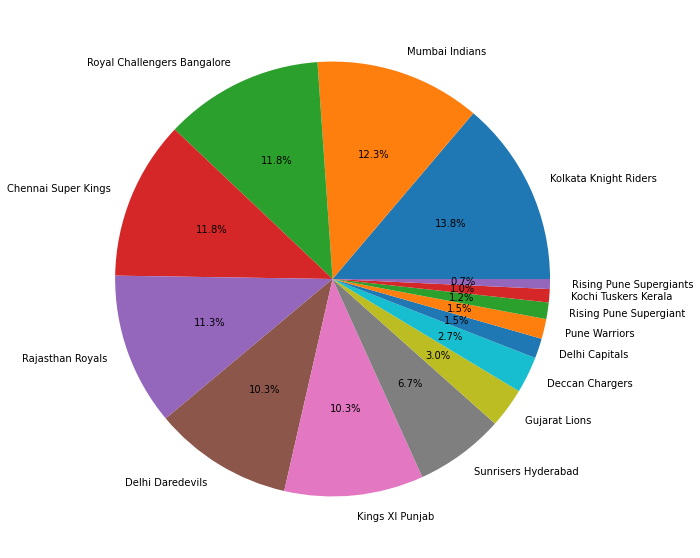

In [19]:
batting_second = matches_df[matches_df['win_by_wickets']!=0]
plt.figure(figsize = (10,10))
plt.pie(list(batting_second['winner'].value_counts()), labels=list(batting_second['winner'].value_counts().keys()),autopct = '%0.1f%%')
plt.show()

**Observation:** KKR performs the best when it chases first

**Some info:** 


1.   MI performs best when it chooses to bat first
2.   RCB performs best when it chooses to chase first




**EDA for RCB**

*City in which RCB has the most number of wins*

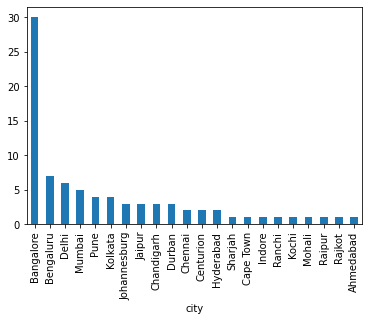

In [20]:
w=matches_df['winner']=='Royal Challengers Bangalore'
w.value_counts()
win=matches_df[w]
win=win.groupby('city').size()
win=win.sort_values(ascending=False)
win.plot(kind='bar')

* **Observation:** Highest number of wins in Bangalore*

*Number of times RCB has won based on its toss decision*

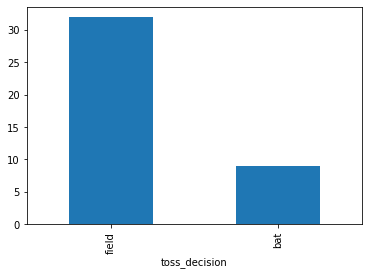

In [21]:
w=matches_df['winner']=='Royal Challengers Bangalore'
w.value_counts()
win=matches_df[w]
w=win['toss_winner']=='Royal Challengers Bangalore'
w.value_counts()
win=win[w]
win=win.groupby('toss_decision').size()
win=win.sort_values(ascending=False)
win.plot(kind='bar')

* * **Obsevation:** RCB is confident when it comes to chasing. Hence it chooses to field most of the time.

DELIVERIES DATA

In [22]:
deliveries_df=pd.read_csv("deliveries.csv")
deliveries_df

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,wide_runs,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,4,0,4,NaN,NaN,NaN
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,2,0,0,0,0,0,2,2,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
179073,11415,2,Chennai Super Kings,Mumbai Indians,20,2,RA Jadeja,SR Watson,SL Malinga,0,0,0,0,0,0,1,0,1,NaN,NaN,NaN
179074,11415,2,Chennai Super Kings,Mumbai Indians,20,3,SR Watson,RA Jadeja,SL Malinga,0,0,0,0,0,0,2,0,2,NaN,NaN,NaN
179075,11415,2,Chennai Super Kings,Mumbai Indians,20,4,SR Watson,RA Jadeja,SL Malinga,0,0,0,0,0,0,1,0,1,SR Watson,run out,KH Pandya
179076,11415,2,Chennai Super Kings,Mumbai Indians,20,5,SN Thakur,RA Jadeja,SL Malinga,0,0,0,0,0,0,2,0,2,NaN,NaN,NaN


In [23]:
deliveries_df.shape

(179078, 21)

In [24]:
deliveries_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 179078 entries, 0 to 179077
Data columns (total 21 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   match_id          179078 non-null  int64 
 1   inning            179078 non-null  int64 
 2   batting_team      179078 non-null  object
 3   bowling_team      179078 non-null  object
 4   over              179078 non-null  int64 
 5   ball              179078 non-null  int64 
 6   batsman           179078 non-null  object
 7   non_striker       179078 non-null  object
 8   bowler            179078 non-null  object
 9   is_super_over     179078 non-null  int64 
 10  wide_runs         179078 non-null  int64 
 11  bye_runs          179078 non-null  int64 
 12  legbye_runs       179078 non-null  int64 
 13  noball_runs       179078 non-null  int64 
 14  penalty_runs      179078 non-null  int64 
 15  batsman_runs      179078 non-null  int64 
 16  extra_runs        179078 non-null  int

In [25]:
deliveries_df.describe()

,match_id,inning,over,ball,is_super_over,wide_runs,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs
count,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000
mean,1802.252957,1.482952,10.162488,3.615587,0.000452,0.036721,0.004936,0.021136,0.004183,0.000056,1.246864,0.067032,1.313897
std,3472.322805,0.502074,5.677684,1.806966,0.021263,0.251161,0.116480,0.194908,0.070492,0.016709,1.608270,0.342553,1.605422
min,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,190.000000,1.000000,5.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,379.000000,1.000000,10.000000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000
75%,567.000000,2.000000,15.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000
max,11415.000000,5.000000,20.000000,9.000000,1.000000,5.000000,4.000000,5.000000,5.000000,5.000000,7.000000,7.000000,10.000000


*Player who has won the most number of player of the match*

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 <a list of 10 Text major ticklabel objects>)

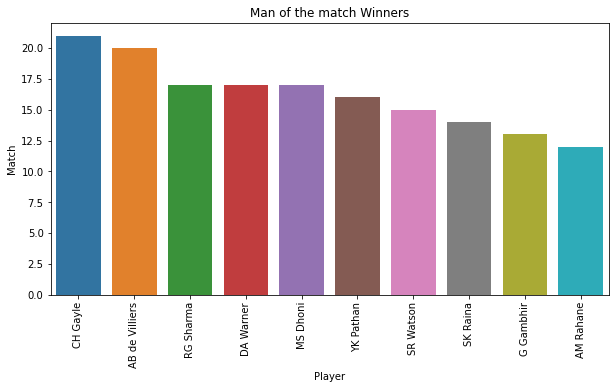

In [26]:
matches_df['player_of_match'].value_counts()[0:5]
plt.figure(figsize=(10,5))
sns.barplot(x=matches_df.player_of_match.value_counts()[:10].index,y=matches_df.player_of_match.value_counts()[:10])
plt.title('Man of the match Winners')
plt.xlabel('Player')
plt.ylabel('Match')
plt.xticks(rotation=90)

**Observation:** Chris Gayle has won the most number of player of the match title

**Batting**

*Player who has the best hard hitting ability*


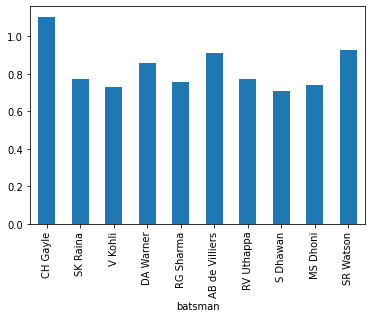

In [27]:
tfs=deliveries_df[(deliveries_df['total_runs']==4) | (deliveries_df['total_runs']==6)]
d=tfs.groupby('batsman').agg({'total_runs':np.sum})
d=d.sort_values('total_runs', ascending=False)
tfs=d[:10]
tbp=pd.merge(deliveries_df,tfs, on='batsman', how='right')
tbp=tbp.groupby('batsman').agg({'ball':np.size})
tbp
hha=pd.merge(tfs,tbp, on='batsman')
hha=(hha['total_runs'] / hha['ball'])
hha.plot(kind='bar')

**OBSERVATION:** CHRIS GAYLE HAS THE HIGHEST HARD HITTING ABILITY

*Consistency of a player*

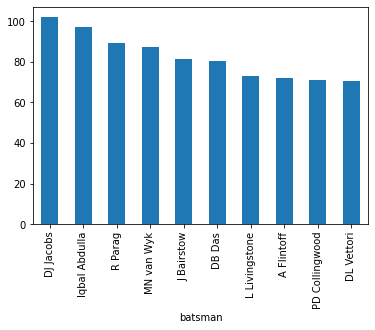

In [28]:
nout=deliveries_df.dropna()
nout=nout.groupby('batsman').agg({'player_dismissed':np.count_nonzero})
ttr=deliveries_df.groupby('batsman').agg({'total_runs':np.sum})
cop=pd.merge(ttr,nout, on='batsman')
cop=(cop['total_runs']/cop['player_dismissed'])
cop=cop.sort_values(ascending=False)
cop=cop[:10]
cop.plot(kind='bar')


**Observation:** DJ Jacobs has highest consistancy 

**Bowling**

*Economy of a bowler*

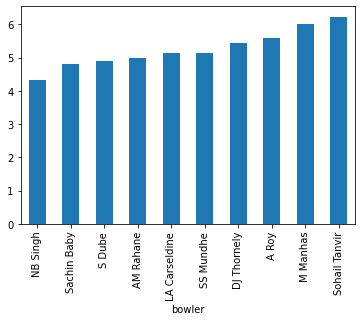

In [29]:
tbr=deliveries_df.groupby('bowler').agg({'total_runs':np.sum})
bc=deliveries_df.groupby('bowler').agg({'bowler':np.count_nonzero}).rename(columns={'bowler':'Count'})
eco=pd.merge(tbr,bc, on='bowler')
eco=(eco['total_runs']/(eco['Count']/6))
eco=eco.sort_values()
eco=eco[1:11]
eco.plot(kind='bar')

**Observation:** NB Singh has the lowest economy 

*Consistency of a bowler*

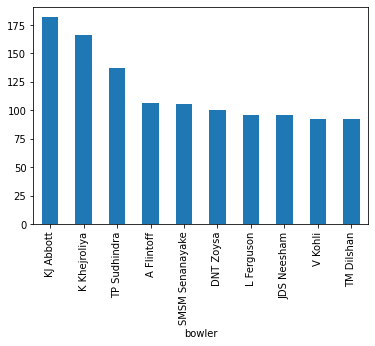

In [30]:
tbr=deliveries_df.groupby('bowler').agg({'total_runs':np.sum})
wi=deliveries_df.dropna()
wi=wi.groupby('bowler').agg({'player_dismissed':np.count_nonzero})
blcon=pd.merge(tbr,wi, on='bowler')
blcon=(blcon['total_runs'] / blcon['player_dismissed'])
blcon=blcon.sort_values(ascending=False)
blcon=blcon[:10]
blcon.plot(kind='bar')

**Observation:** bowler with highest consistency is KJ Abbott

*Wicket taking ability of a bowler*

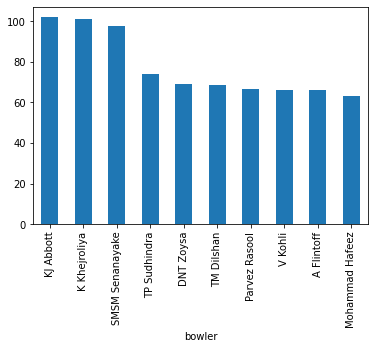

In [31]:
wta=pd.merge(bc,wi, on='bowler')
wta=(wta['Count']/ wta['player_dismissed'])
wta=wta.sort_values(ascending=False)
wta=wta[:10]
wta.plot(kind='bar')

**Observation:** KJ Abbott has the highest wicket taking ability



---


**Conclusion**



---

*The most successful team*: Mumbai Indians as it has the most number of wins. 

*Factors causing the winning or losing of MI based on general observations:*
Mumbai Indians has also won the most number of tosses therefore it gives it the upper hand and helps it set the tone of the game. It performs better when it chooses to bat first as opposed to chasing. 


*Special EDA done for RCB to determine the factors favourable for its winning:*
RCB performs better when it chases first. That is why it is observed that whenever RCB wins the toss it chooses to field first. It has won the most number of matches in its home ground at Bangalore making it, its most favourable venue.


*The most successful player based on man of the match:* Chris Gayle

*The most successful batsman*:


1.   Based on Hard hitting ability: Chris Gayle
2. Based on consistency: DJ Jacobs

*The most successful bowler*:



1.   Based on economy: NB Singh
2. Based on consistency: KJ Abbott
3. Based on Wicket taking ability: KJ Abbott

*Team a company should endorse based on this simple EDA:* Mumbai Indians
*Players a company should endorse based  on this simple EDA:* Chris Gayle and KJ Abbott






